# Problem Statement

We are a Surveillance and CCTV company. We have a standard CCTV system, and we want to upgrade it into smart CCTVs. We want a solution that enables our cameras to detect human patterns, count objects, provide analysis within a 24-hour cooldown, and correctly detect the proper alert action for the system.

# Data Science Methodology

Let's apply the Data Science Methodology. 

Important note: it is really hard to mimic real-case projects. Below points describe assumptions and differences between any personal project/research and real-case scenario project.

- **Raw Data**: In my personal project, I am going to collect video and image data from more than one resource. However, if I want to be more accurate, I cannot call it raw data. This is because most resources are providing data already labeled (annotated). **Annotation** consume heavy resources from the team. In addition to annotation, ETL process will be missing in my personal project where in real cases data are being stored in certain Data Base where collection requires queries (assuming that there is no platform specifically to the firm purposes). For example, I have worked in a company where the collection of data is through platform, where me as a data scientist did not need any ETL techniques, queries, or communicating with a Data Engineer to help in ETL process. Meaning that, the job of Data Engineering and ETL might be done one time, enabling analysts and scientist to perform ETL process easily and lonely in the future. 

## Surveillance and Alarm Management Business Understanding and Problem Definition

I can conclude that they have CCTVs that are designed for **standard monitoring activities**, where cameras are capturing normal videos. Meaning that video and image data that we should use to train the model contains standard CCTV captures, not advanced videos and images like thermal captures nor medical and microbial captures.

However, it was mentioned in the problem statement that they don't need to detect anomalies only! Stakeholders want also to have smart cameras that provide analysis on daily basis like counting and identifying categories, meaning that we are looking to achieve the following goals:

- To enable cameras accurately detect positive alarms and minimize false and missing alarms. I will discuss more about this point in the model evaluation stage.

- To enable the model to integrate with the CCTV system by upgrading it to intelligent level. Below list shows new features to be added:
    - Provide daily basis counting to objects. This requires to train the model with various categories, so it can correctly identify objects in real time. I will add *New* as feature so whenever a new class that the model does not know, the data scientist then label captures manually and train and new model based on that. This is an iterative process, and it is a part of optimizing the models almost in daily basis.
    - We need to include in the daily analysis dashboards a section for counting patterns. i.e., in addition labeling anomalies, I will introduce normal patterns, for example but not limited to: paying in supermarket, walking, driving/parking, gender prediction, and many many ideas that could lead to insights. In real case, this should be discussed with stakeholders twice per week or minimum once. 




## Data Collection Criteria and Strategy

During my graduate degree I used to implement Computer Vision projects for the purpose of learning Deep Learning algorithms as theory. However, in this project I will use raw data that is not being annotated.

### VIRAT Video Dataset Overview

The VIRAT dataset is a popular benchmark for human and vehicle activity detection in surveillance videos. It includes realistic scenes recorded from various camera angles across different locations in the U.S., with over 40 labeled activities.

Video quality varies—some clips are high-resolution, others low—with people appearing at different sizes and frame rates ranging from 2 to 30 FPS. It's designed to reflect real-world conditions, which makes it great for testing models on practical surveillance data.

Access requires approval via the official VIRAT website. Once granted, the full dataset (videos + annotations) can be downloaded through provided links.

#### Reason for Exclusion

Although the dataset is high quality, I won’t be using it because of its size—over **550 GB**. It’s too large to handle efficiently within my current resources.

#### Alternative: TinyVIRAT Dataset

As a smaller option, I explored **TinyVIRAT**, a scaled-down dataset (~3.6 GB) made for quick experiments. It includes short, low-resolution video clips with multiple action labels, ideal for lightweight testing.

The GitHub repo ([Tiny-VIRAT](https://github.com/UgurDemir/Tiny-VIRAT)) provides helper scripts and documentation. To get the actual videos, you can directly download them from:

- [https://www.crcv.ucf.edu/tiny-actions-challenge-cvpr2021/data/TinyVIRAT-v2.zip](https://www.crcv.ucf.edu/tiny-actions-challenge-cvpr2021/data/TinyVIRAT-v2.zip)

TinyVIRAT is helpful for prototyping but doesn't fully replace the coverage or complexity of the full VIRAT dataset.

#### References

- VIRAT Dataset Official Website: [https://www.viratdata.org/](https://www.viratdata.org/)
- Tiny-VIRAT GitHub: [https://github.com/UgurDemir/Tiny-VIRAT](https://github.com/UgurDemir/Tiny-VIRAT)
- Tiny-VIRAT-v2 Download: [https://www.crcv.ucf.edu/tiny-actions-challenge-cvpr2021/data/TinyVIRAT-v2.zip](https://www.crcv.ucf.edu/tiny-actions-challenge-cvpr2021/data/TinyVIRAT-v2.zip)
- Roboflow Hosted Subset: [https://universe.roboflow.com/radoslaw-kawczak/virat-v2](https://universe.roboflow.com/radoslaw-kawczak/virat-v2)

### Data Management

To manage datasets more effectively, I will store and organize my data using Hugging Face. I plan to create dataset repositories and use Python libraries provided by Hugging Face for upload, and effective version control.















## Model Evaluation - Definitions in the Context of Surveillance and Alarm Management



Confusion Matrix

TP: correct positives, reflects the number of positive cases that been predicted correctly.

In our project, that represents: Number of correctly predicted cases of a real threaten. 

TN: correct negatives, reflects the number of negative cases that been predicted correctly.

In our project, that represents: Number of correctly predicted cases of normal activity (no threaten detected).

FP: Wrong positives, reflects the number of negative cases that been predicted wrongly as positive

In our project, that represents: Number of wrongly predicted cases of normal activities as a real threaten. Which is in alarm management called `False Alarm`

FN : Missed positives, reflects the number of positive cases that been predicted wrongly as negative

In our project, that represents: Number of wrongly predicted cases of real threaten as a normal activity. In the context of alarm management this represents a real threaten that being not predicted. This metric considered the most dangerous one and we want our model to have the most minimum value as possible, where zero cases is the optimum result we must aim to.


In [1]:
# importing needed libraries

import glob # read mp4 file
import os
import cv2 # used poetry add opencv-python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm

In [2]:
# Set the root folder path
root_folder = r"D:\2-Datasets from Various Resources\Tiny-VARIAT\Tiny_VIRAT_v1"  # Replace with your actual path

# Find all .mp4 files recursively
mp4_files = glob.glob(os.path.join(root_folder, "**", "*.mp4"), recursive=True)

# Print number of mp4 files
print(f"Total .mp4 files found: {len(mp4_files)}")

Total .mp4 files found: 12829


In [3]:
for file in mp4_files[:5]:  # Preview first 5 files
    print(file)

D:\2-Datasets from Various Resources\Tiny-VARIAT\Tiny_VIRAT_v1\VIRAT_S_000000\5570.mp4
D:\2-Datasets from Various Resources\Tiny-VARIAT\Tiny_VIRAT_v1\VIRAT_S_000000\5571.mp4
D:\2-Datasets from Various Resources\Tiny-VARIAT\Tiny_VIRAT_v1\VIRAT_S_000000\5572.mp4
D:\2-Datasets from Various Resources\Tiny-VARIAT\Tiny_VIRAT_v1\VIRAT_S_000000\5573.mp4
D:\2-Datasets from Various Resources\Tiny-VARIAT\Tiny_VIRAT_v1\VIRAT_S_000000\5574.mp4


In [4]:

# Preview a few sample videos
for video_path in mp4_files[:5]:
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"Failed to open: {video_path}")
        continue

    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    duration = frame_count / fps if fps else 0

    print(f"\nVideo: {video_path}")
    print(f"Resolution: {width}x{height}")
    print(f"FPS: {fps}")
    print(f"Total Frames: {frame_count}")
    print(f"Duration (s): {duration:.2f}")

    cap.release()



Video: D:\2-Datasets from Various Resources\Tiny-VARIAT\Tiny_VIRAT_v1\VIRAT_S_000000\5570.mp4
Resolution: 112x112
FPS: 29.97
Total Frames: 100
Duration (s): 3.34

Video: D:\2-Datasets from Various Resources\Tiny-VARIAT\Tiny_VIRAT_v1\VIRAT_S_000000\5571.mp4
Resolution: 128x128
FPS: 29.97
Total Frames: 113
Duration (s): 3.77

Video: D:\2-Datasets from Various Resources\Tiny-VARIAT\Tiny_VIRAT_v1\VIRAT_S_000000\5572.mp4
Resolution: 34x34
FPS: 29.97
Total Frames: 101
Duration (s): 3.37

Video: D:\2-Datasets from Various Resources\Tiny-VARIAT\Tiny_VIRAT_v1\VIRAT_S_000000\5573.mp4
Resolution: 30x30
FPS: 29.97
Total Frames: 121
Duration (s): 4.04

Video: D:\2-Datasets from Various Resources\Tiny-VARIAT\Tiny_VIRAT_v1\VIRAT_S_000000\5574.mp4
Resolution: 28x28
FPS: 29.97
Total Frames: 91
Duration (s): 3.04


In [5]:
# Collecting the metadata into pandas DataFrame
video_metadata = []

for path in mp4_files:
    cap = cv2.VideoCapture(path)
    if not cap.isOpened():
        continue

    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    duration = frame_count / fps if fps else 0

    video_metadata.append({
        "file_path": path,
        "width": width,
        "height": height,
        "resolution": f"{width}x{height}",
        "fps": round(fps, 2),
        "frame_count": frame_count,
        "duration_sec": round(duration, 2)
    })

    cap.release()

# Create DataFrame
df_metadata = pd.DataFrame(video_metadata)

# Preview the first few rows
df_metadata.head()


,file_path,width,height,resolution,fps,frame_count,duration_sec
0,D:\2-Datasets from Various Resources\Tiny-VARI...,112,112,112x112,29.97,100,3.34
1,D:\2-Datasets from Various Resources\Tiny-VARI...,128,128,128x128,29.97,113,3.77
2,D:\2-Datasets from Various Resources\Tiny-VARI...,34,34,34x34,29.97,101,3.37
3,D:\2-Datasets from Various Resources\Tiny-VARI...,30,30,30x30,29.97,121,4.04
4,D:\2-Datasets from Various Resources\Tiny-VARI...,28,28,28x28,29.97,91,3.04


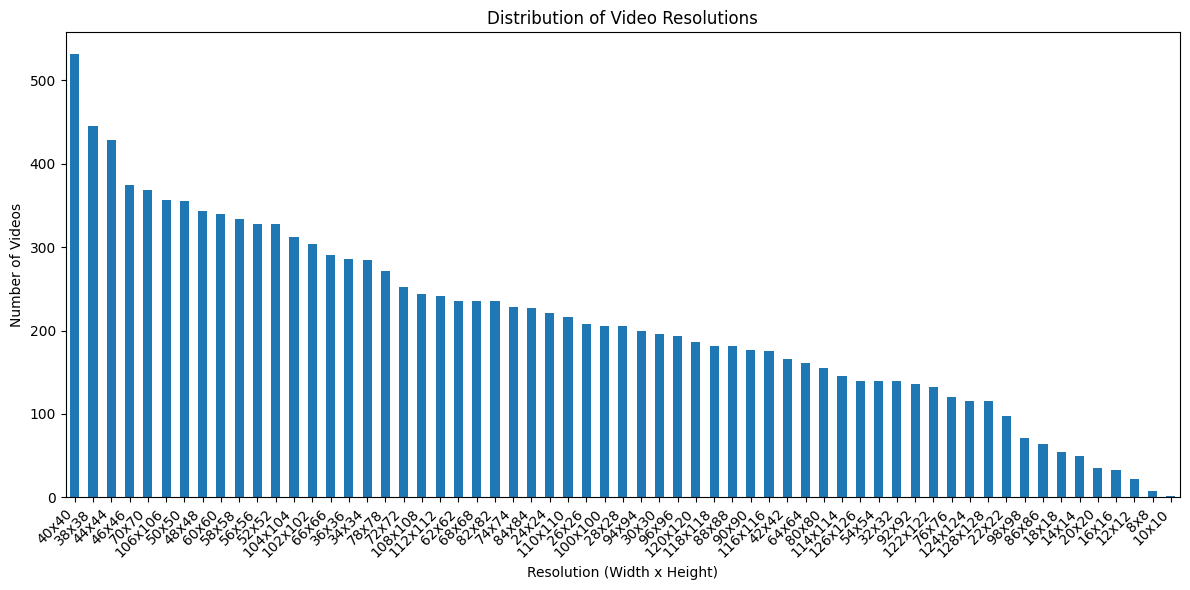

In [6]:

# Count unique resolutions
resolution_counts = df_metadata['resolution'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
resolution_counts.plot(kind='bar')
plt.title('Distribution of Video Resolutions')
plt.xlabel('Resolution (Width x Height)')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


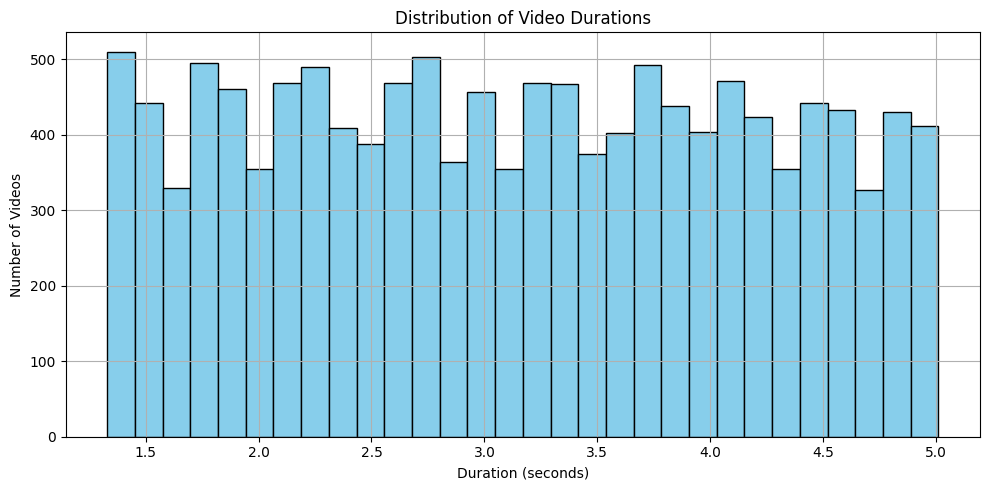

In [7]:
plt.figure(figsize=(10, 5))
plt.hist(df_metadata['duration_sec'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Video Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of Videos')
plt.grid(True)
plt.tight_layout()
plt.show()


Most common frame count: [111, 120]


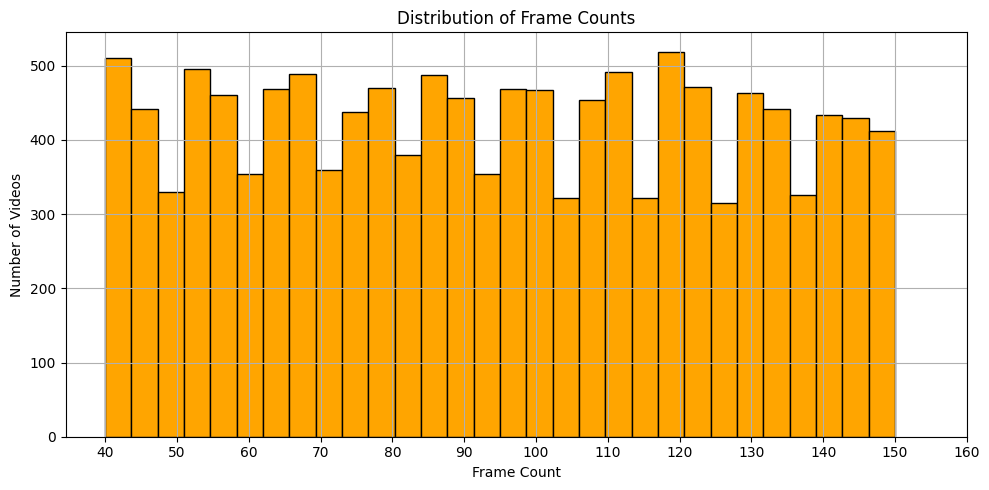

In [8]:
frame_count_mode = df_metadata['frame_count'].mode().tolist()
print(f"Most common frame count: {frame_count_mode}")

plt.figure(figsize=(10, 5))
plt.hist(df_metadata['frame_count'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Frame Counts')
plt.xlabel('Frame Count')
plt.ylabel('Number of Videos')

# Custom x-axis ticks starting from 40
min_val = df_metadata['frame_count'].min()
max_val = df_metadata['frame_count'].max()

# Ensure starting from the nearest multiple of 10 that is ≥ 40
start_tick = max(40, (min_val // 10) * 10)
end_tick = ((max_val // 10) + 2) * 10  # +2 to pad the range a bit

plt.xticks(np.arange(start=start_tick, stop=end_tick, step=10))

plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
# Get the top 5 most common frame counts
top_5_frames = df_metadata['frame_count'].value_counts().head(5)

# Convert to DataFrame and sort by number of videos
top_5_table = top_5_frames.reset_index()
top_5_table.columns = ['Frame Count', 'Number of Videos']
top_5_table = top_5_table.sort_values(by='Number of Videos', ascending=False).reset_index(drop=True)

# Print the sorted table
print(top_5_table)

   Frame Count  Number of Videos
0          120               142
1          111               142
2           41               141
3           93               136
4           66               135


In [10]:
# export df to csv
df_metadata.to_csv("Tiny-VIRAT_metadata.csv", index=False)

In [11]:
# Example filters
tiny_videos = df_metadata[(df_metadata['width'] < 50) | (df_metadata['height'] < 50)]
short_videos = df_metadata[df_metadata['duration_sec'] < 2.0]

print(f"Tiny resolution videos: {len(tiny_videos)}")
print(f"Short duration videos: {len(short_videos)}")


Tiny resolution videos: 4130
Short duration videos: 2331


In [12]:
# filter by resolution
# Define filtering thresholds
min_width = 50
min_height = 50
min_duration = 2.0  # seconds

# Apply filtering
clean_df = df_metadata[
    (df_metadata['width'] >= min_width) &
    (df_metadata['height'] >= min_height) &
    (df_metadata['duration_sec'] >= min_duration)
].reset_index(drop=True)

print(f"Remaining videos after filtering: {len(clean_df)}")

# Save to new CSV (optional)
clean_df.to_csv("cleaned_Tiny-VIRAT_metadata.csv", index=False)


Remaining videos after filtering: 7115


In [14]:
# Define save directory
frame_save_dir = r"D:\2-Datasets from Various Resources\Tiny-VARIAT\Tiny_VIRAT_v1\extracted_frames"
os.makedirs(frame_save_dir, exist_ok=True)

# Optional: Open a log file to save messages
log_file = open("frame_extraction_log.txt", "w")

# Loop with progress bar
for idx, row in tqdm(clean_df.iterrows(), total=len(clean_df), desc="Extracting Frames"):
    video_path = row['file_path']
    video_id = os.path.splitext(os.path.basename(video_path))[0]
    save_folder = os.path.join(frame_save_dir, video_id)
    os.makedirs(save_folder, exist_ok=True)

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        log_file.write(f"[ERROR] Failed to open {video_path}\n")
        continue

    fps = cap.get(cv2.CAP_PROP_FPS)
    if fps == 0 or fps is None:
        log_file.write(f"[ERROR] FPS = 0 in {video_path}\n")
        cap.release()
        continue

    frame_interval = int(fps)  # 1 frame per second

    frame_idx = 0
    saved_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_idx % frame_interval == 0:
            frame_filename = os.path.join(save_folder, f"frame_{frame_idx}.jpg")
            cv2.imwrite(frame_filename, frame)
            saved_count += 1

        frame_idx += 1

    cap.release()
    log_file.write(f"[OK] {video_id}: {saved_count} frames extracted\n")

log_file.close()


Extracting Frames: 100%|██████████| 7115/7115 [03:57<00:00, 29.93it/s]
